In [51]:
import numpy as np
import scipy.signal as signal
from pydub import AudioSegment
import os
import matplotlib.pyplot as plt


def morse_code_translator(signal, sample_rate):
    # Apply FFT
    fft_result = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_result)  # Compute magnitude of FFT result

    # Find important frequencies
    freqs = np.fft.fftfreq(len(signal), 1 / sample_rate)
    max_freq_index = np.argmax(fft_magnitude)
    max_freq = freqs[np.argmax(fft_magnitude)]  # Find the frequency with maximum magnitude
    print("Max Frequency:", max_freq)
    # Find important frequencies
    # Example: You might determine important frequencies based on their magnitudes in the FFT result
    threshold = 0.1 * fft_magnitude[max_freq_index]
    lower_index = np.where(fft_magnitude[:max_freq_index] < threshold)[0][-1]
    upper_index = np.where(fft_magnitude[max_freq_index:] < threshold)[0][0] + max_freq_index
    print(freqs[lower_index-10:upper_index+10])
    print(fft_magnitude[lower_index-10:upper_index+10])
    print(lower_index, max_freq_index, upper_index)
    bandwidth = freqs[upper_index] - freqs[lower_index]
    print("Bandwidth:", bandwidth)
    t = np.arange(256)
    plt.plot(freqs, fft_result.real)
    plt.show()
    # Filter design
    # Example: You might design a bandpass filter based on the important frequencies
    
    # Apply bandpass filter
    # Example: You might use scipy's bandpass filter function
    # filtered_signal = signal.lfilter(b, a, signal)
    
    #return filtered_signal



Sample Rate: 44100
Signal Data:[0 0 0 ... 0 0 0]
Max Frequency: 525.2325628221649
[524.1226039  524.17810184 524.23359979 524.28909774 524.34459568
 524.40009363 524.45559158 524.51108952 524.56658747 524.62208541
 524.67758336 524.73308131 524.78857925 524.8440772  524.89957514
 524.95507309 525.01057104 525.06606898 525.12156693 525.17706488
 525.23256282 525.28806077 525.34355871 525.39905666 525.45455461
 525.51005255 525.5655505  525.62104845 525.67654639 525.73204434
 525.78754228 525.84304023 525.89853818 525.95403612 526.00953407
 526.06503202]
[1.13754688e+08 7.46062047e+07 9.91789160e+07 4.05616303e+08
 2.11551951e+08 1.39807800e+08 1.87278947e+08 6.09710922e+08
 3.30400777e+08 9.71219854e+07 6.83370142e+06 2.36521074e+08
 3.39339461e+08 1.59472449e+08 1.33952404e+08 3.72968334e+08
 6.96836667e+08 3.83664988e+08 4.24868830e+08 8.68786571e+08
 1.08220025e+09 2.67397469e+08 1.78227103e+08 3.17804190e+08
 6.41087111e+08 1.53633110e+08 9.39815336e+07 1.43484539e+08
 5.31007698e+0

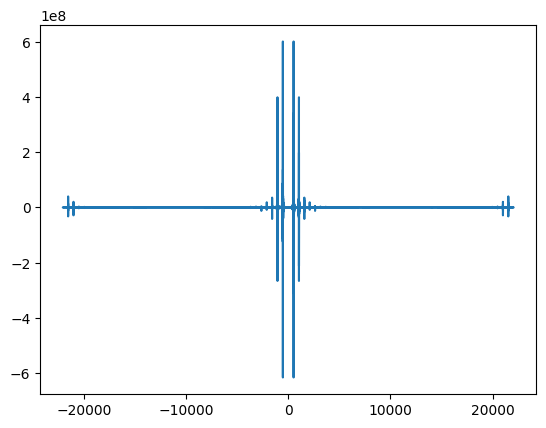

In [53]:

# Read audio file
file_path = "SOS.mp3"  # Replace with your MP3 file path
audio = AudioSegment.from_mp3(file_path)
sample_rate = audio.frame_rate
print("Sample Rate: "+ str(sample_rate))
signal_data = np.array(audio.get_array_of_samples())
print("Signal Data:" +  str(signal_data))

# Apply morse code translator
filtered_signal = morse_code_translator(signal_data, sample_rate)

# Output filtered signal or further process it